#Section-C


##Part-a

In [113]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sbrn
import warnings
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn import linear_model


In [40]:
df = pd.read_csv("CO2 Emissions.csv")
#Viewing the first 5 and last 5 rows of the dataframe made
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

The `.info()` function tells us about the data quality, as we can see from the data, there are a total of 7385 entries/rows and 12 columns out of which non of them contain non-value so there is no need to perform data-cleaning to remove the null values.

<Figure size 1000x500 with 0 Axes>

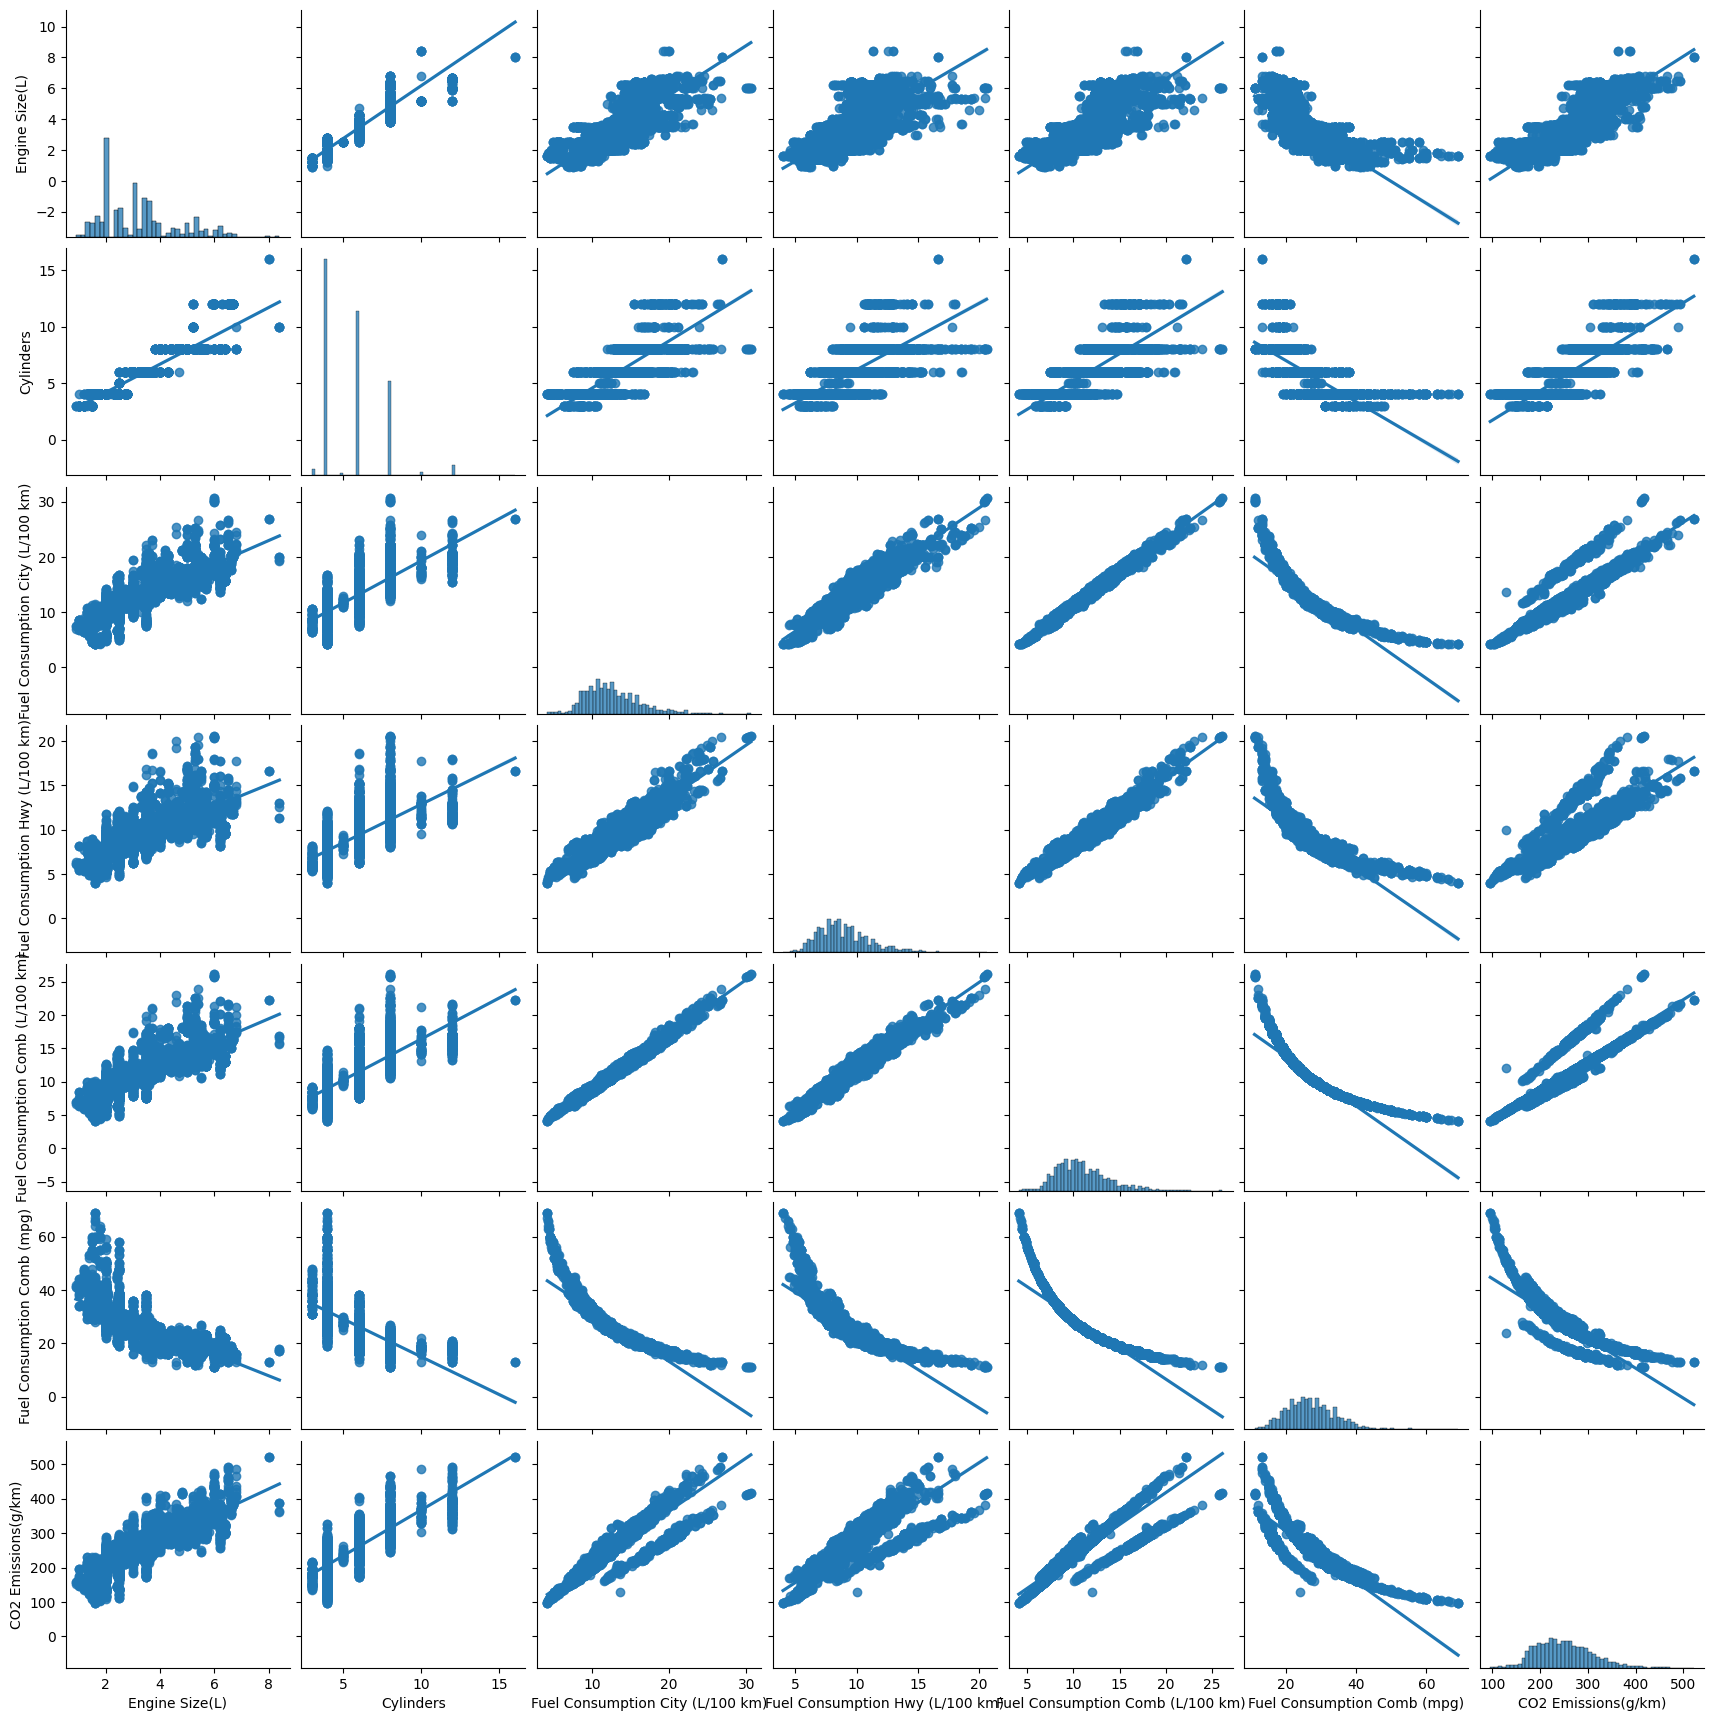

In [42]:
plt.figure(figsize=(10,5))
sbrn.pairplot(df,kind="reg")
plt.show()

All types of numerical scatter plot visualized

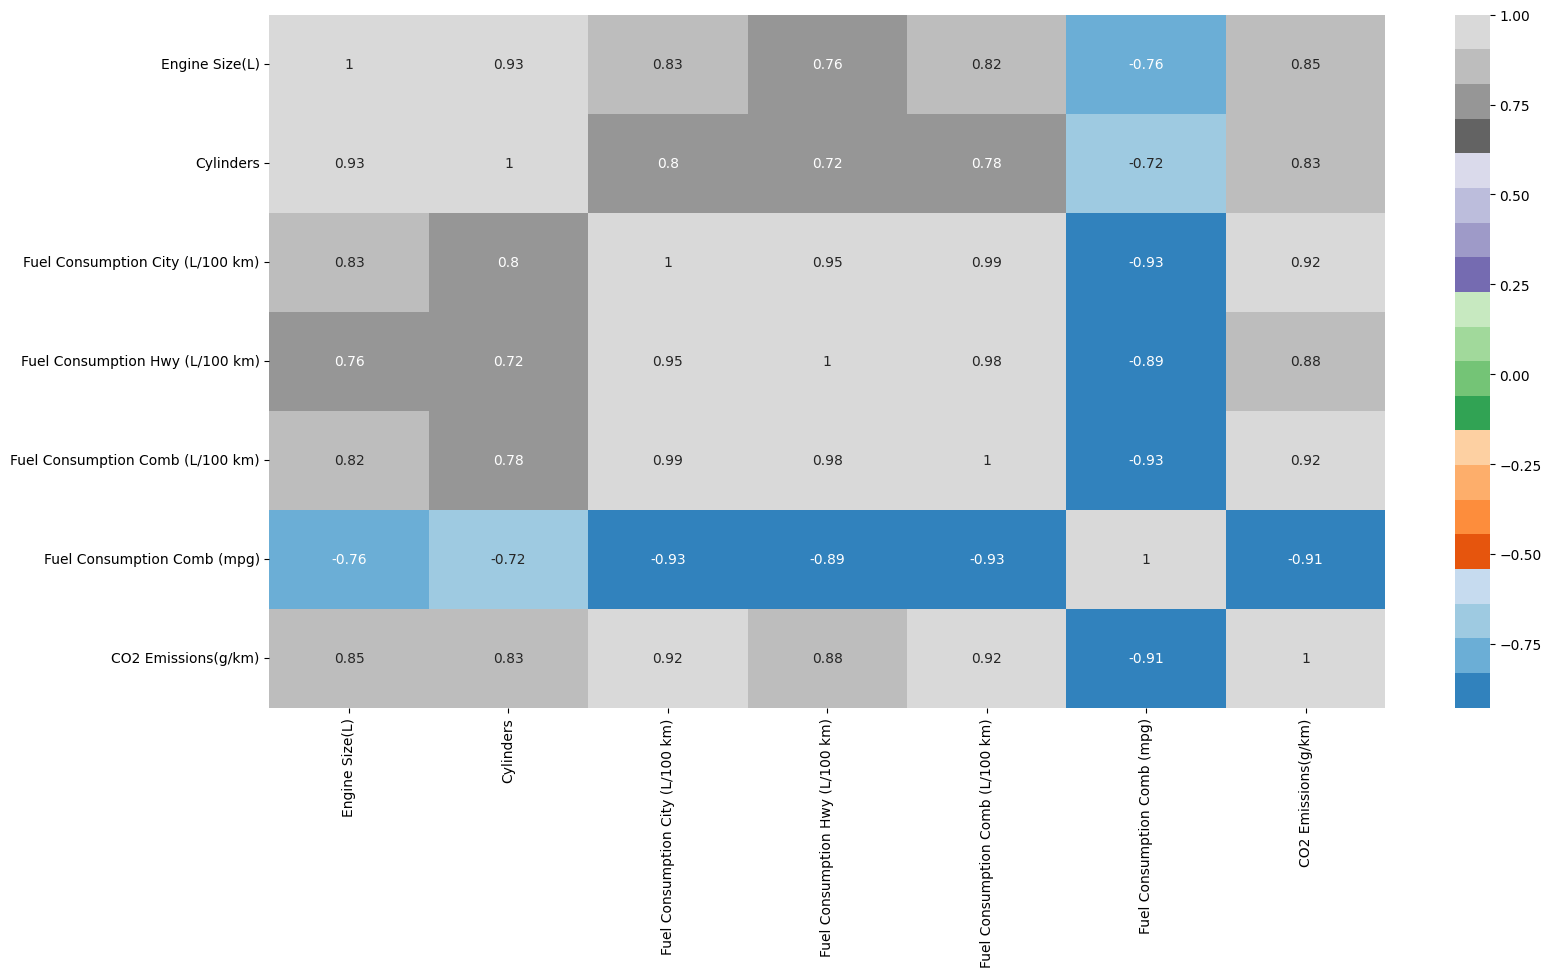

In [43]:
#Making Heat Map
plt.figure(figsize=(18,9))
df_num_features = df.select_dtypes(include=np.number)
corr =  df_num_features.corr()
corr =df_num_features.corr(method='pearson')
sbrn.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

Plotting the heatmap using seaborn to make inferences from the data

In [44]:
# label_encoder = pre.LabelEncoder()
# arr = label_encoder.fit_transform(df['Fuel Type'])
# df.groupby('Fuel Type').nunique()
FuelT = df['Fuel Type']
Fuel_dict = {'Z':0,'D':0,'E':0,'X':0,'N':0}
FuelT.shape
for i in range(FuelT.shape[0]):
   Fuel_dict[FuelT[i]]+=1


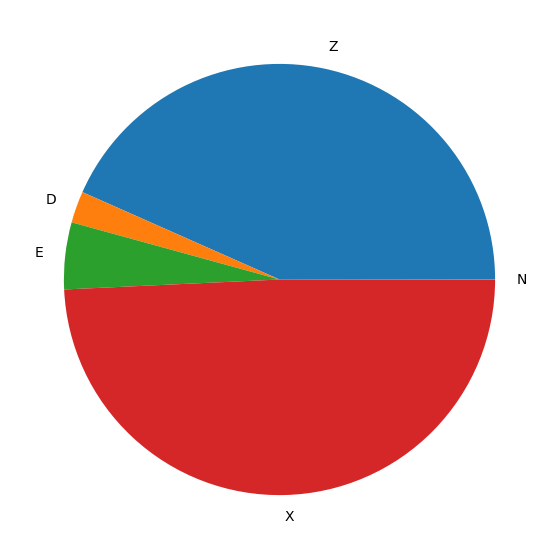

In [45]:
# Creating pie chart
fig = plt.figure(figsize =(10, 7))
plt.pie(list(Fuel_dict.values()), labels =list(Fuel_dict.keys()))
# show plot
plt.show()

X is the most common fuel type

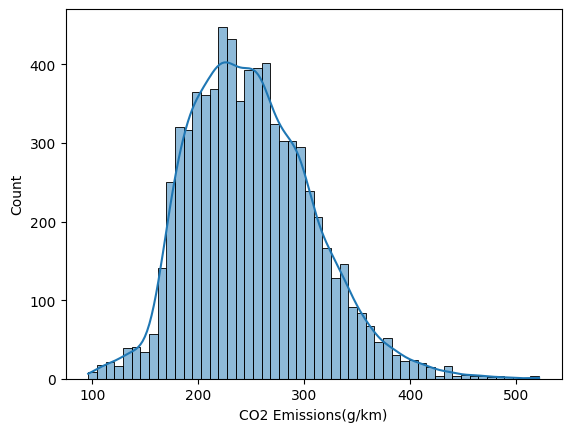

In [46]:
sbrn.histplot(df['CO2 Emissions(g/km)'],kde=True)
plt.show()

Implementing Histogram Over the dataset for the target variable CO2 emissions to better understand the data

Text(0.5, 1.0, 'Car Brands')

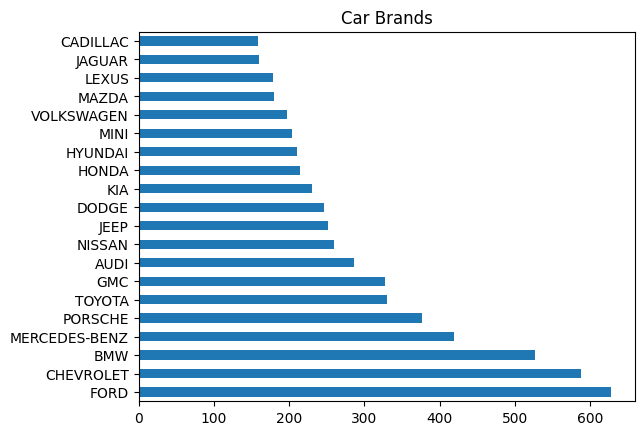

In [47]:
df['Make'].value_counts()[:20].plot(kind='barh')
plt.title('Car Brands')

Ford is the most popular choice for buying cars

Text(0.5, 1.0, 'Car Fuels')

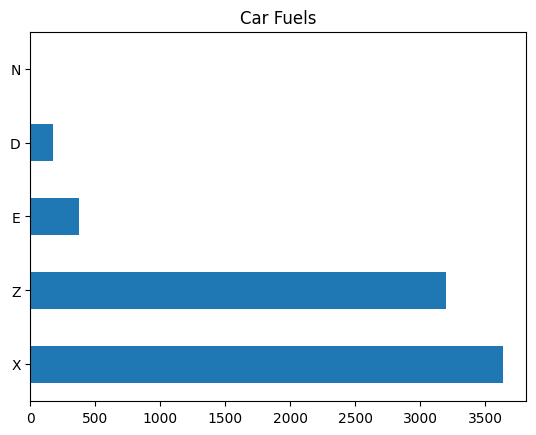

In [48]:
df['Fuel Type'].value_counts()[:20].plot(kind='barh')
plt.title('Car Fuels')

X type fuel is the most common fuel

Now, making inferences on the Brand and Fuel influence on the CO2 emissions

Text(0.5, 1.0, 'CO2 Emissions v/s Make In Descending Orders ')

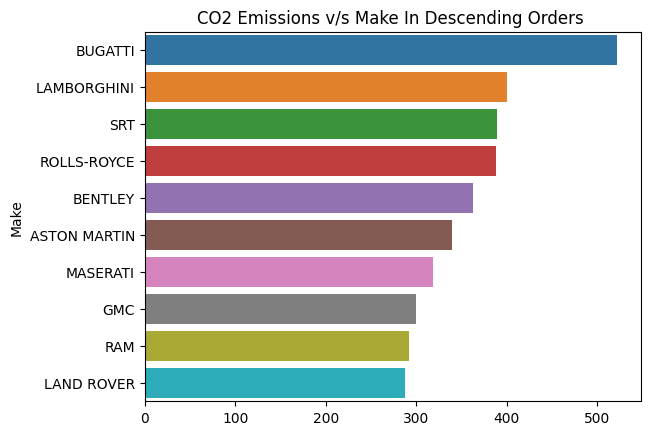

In [49]:
MakeVsCo2Des = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
MakeVsCo2 = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=True).head(10)

sbrn.barplot(x = MakeVsCo2Des.values,y = MakeVsCo2Des.index)
plt.title('CO2 Emissions v/s Make In Descending Orders ')


<Axes: title={'center': 'CO2 Emissions v/s Make In Ascending Order '}, ylabel='Make'>

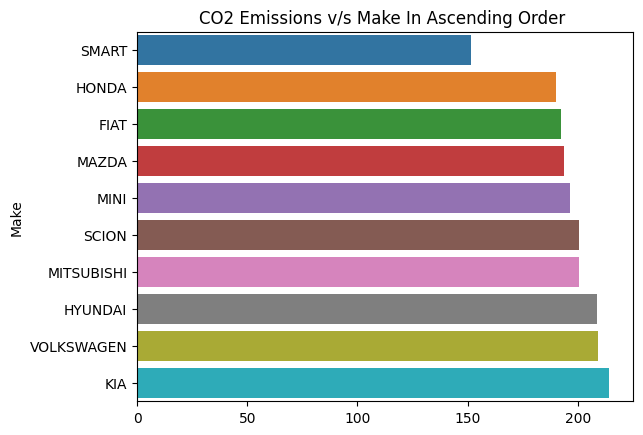

In [50]:
plt.title('CO2 Emissions v/s Make In Ascending Order ')
sbrn.barplot(x = MakeVsCo2.values,y = MakeVsCo2.index)

Average CO2 emissions (g/km) is the highest for Buggati while the least for Smart

Text(0.5, 1.0, 'CO2 Emissions v/s Fuel Type In Descending Orders ')

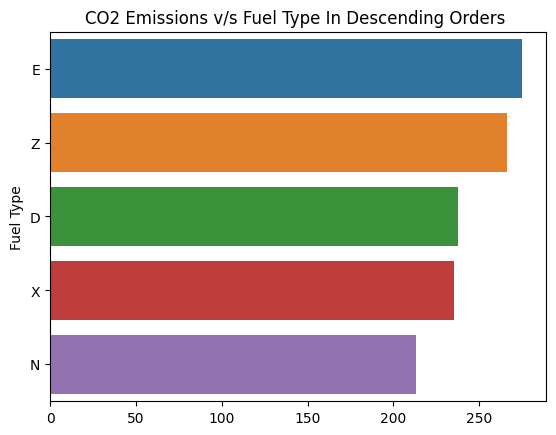

In [51]:
FuelTypeVsCo2Des = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
sbrn.barplot(x = FuelTypeVsCo2Des.values,y = FuelTypeVsCo2Des.index)
plt.title('CO2 Emissions v/s Fuel Type In Descending Orders ')

Cars with E type excude the most CO2 while though with N type excude the least CO2

##Part-b

In [52]:
make = df['Make']
d = df.drop("Make", axis=1)
cols =['Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption City (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
data = pd.get_dummies(d[cols])
standardized_data = StandardScaler().fit_transform(data) #Scaling the data for our ease
print(standardized_data.shape)

(7385, 2108)


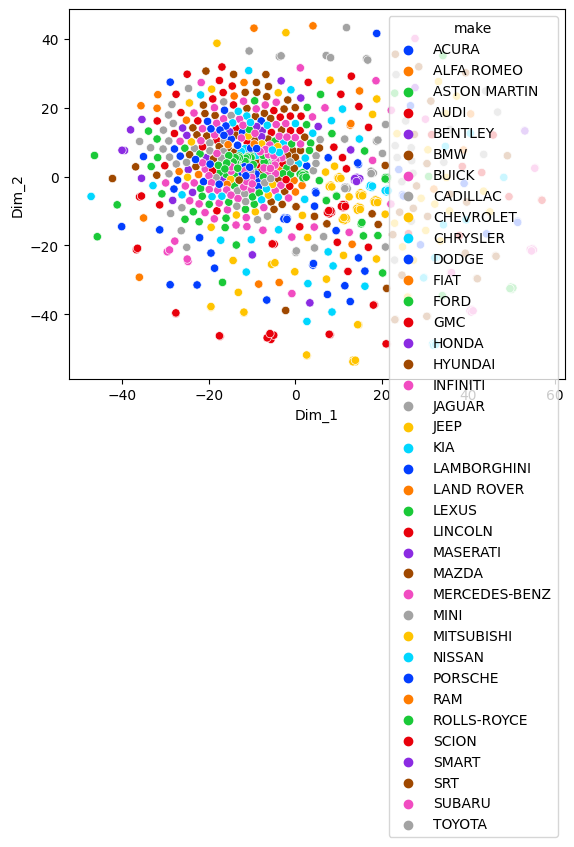

In [53]:
#TSNE for CARS
data_1000 = standardized_data[0:1000, :]
labels_1000 = make[0:1000]
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_1000)
#Getting TSNE ready
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "make"))

sbrn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='make', palette="bright")
plt.show()

In [54]:
fuel = df['Fuel Type']
d = df.drop("Fuel Type", axis=1)
cols =['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Consumption City (L/100 km)','Fuel Consumption City (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
data = pd.get_dummies(d[cols])
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(7385, 2145)


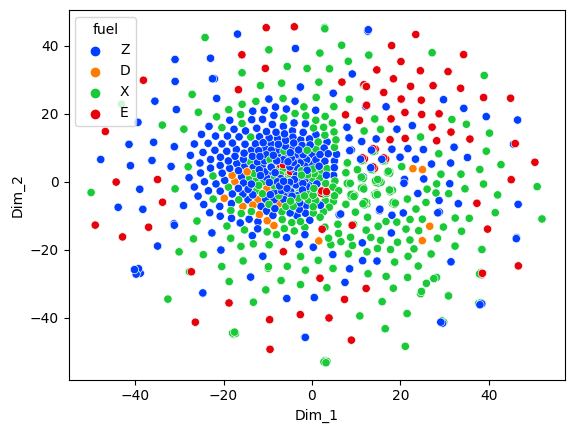

In [55]:
#TSNE for Fuel Types
data_1000 = standardized_data[0:1000, :]
labels_1000 = fuel[0:1000]
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_1000)
#Getting TSNE ready
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "fuel"))

sbrn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='fuel', palette="bright")
plt.show()

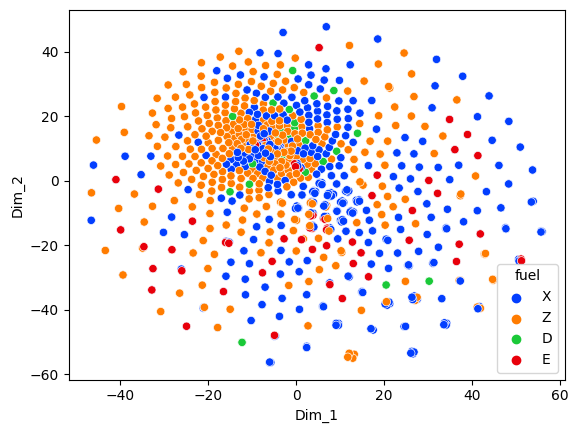

In [56]:
data_1000 = standardized_data[  1000:2000, :]
labels_1000 = fuel[1000:2000]
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_1000)
#Getting TSNE ready
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "fuel"))
#Setting parameters
sbrn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='fuel', palette="bright")
plt.show()

##Part-c

Since, there are no null values in the data, we can skip the step to remove the null/missing data and directly find and remove the duplicate data

In [57]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the dataframe currently'.format(duplicate))
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the dataframe after duplicate removal'.format(duplicate))

There are 1103 duplicated rows in the dataframe currently
There are 0 duplicated rows in the dataframe after duplicate removal


Converting the Categorical label based data to label based numerical encoding

In [58]:
#df['Make'].unique()
label_encoder = pre.LabelEncoder()
#Label based encoding for Make
df['Make']= label_encoder.fit_transform(df['Make'])
df['Make'].unique()
#Label based encoding for Model
df['Model']= label_encoder.fit_transform(df['Model'])
df['Model'].unique()
#Label based encoding for Vehicle Class
df['Vehicle Class']= label_encoder.fit_transform(df['Vehicle Class'])
df['Vehicle Class'].unique()
#Label based encoding for Transmission
df['Transmission']= label_encoder.fit_transform(df['Transmission'])
df['Transmission'].unique()
#Label based encoding for Fuel Type
df['Fuel Type']= label_encoder.fit_transform(df['Fuel Type'])
df['Fuel Type'].unique()

array([4, 0, 3, 1, 2])

In [59]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
6278,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
6279,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
6280,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


In [60]:
df.info() #To Make Sure what all data type does the current data frame consist of

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   int64  
 1   Model                             6282 non-null   int64  
 2   Vehicle Class                     6282 non-null   int64  
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   int64  
 6   Fuel Type                         6282 non-null   int64  
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

In [61]:
#Splitting the data set first into input and output and then into 80-20
X = df[['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
y = df[['CO2 Emissions(g/km)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regr = LinearRegression()
regr

LinearRegression()

In [62]:
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9183110192318188


In [63]:
def MAE(yTrue,yPred,len): #Calculates the MAE
  #le = np.count_nonzero(yTrue)
  sum = 0
  for i in range(len):
    sum += abs((yTrue[i] - yPred[i])/len)
  if(sum.shape==()):
    return (sum)
  return(sum[0])
def MSE(yTrue,yPred,len): #Calculates the MSE
  # len = np.count_nonzero(yTrue)
  sum = 0
  for i in range(len):
    sum += (abs((yTrue[i] - yPred[i])/len))**2
  if(sum.shape==()):
    return (sum*len)
  return(sum[0]*len)
def RMSE(yTrue,yPred,len): #Calculates the RMSE
  # len = np.count_nonzero(yTrue)
  sum = 0
  for i in range(len):
    sum += (abs((yTrue[i] - yPred[i])/len))**2
  if(sum.shape==()):
    return ((sum*len)**0.5)
  return((sum[0]*len)**0.5)
def AdjustedR2(yTrue,yPred,p,len): #Calculates the Adjusted R2
  R2=r2_score(yTrue,yPred)
  # len = np.count_nonzero(yTrue)
  val = (1-(1-R2*((len-1)/(len-p-1))))
  return val


In [64]:
  # r2_score(y_true,y_pred)
  #Function to print all the necessary info that is MAE, MSE, RMSE, R2 and Adjusted R2 for Non Normalised Model
def PrintAll(X_test,y_test,X_train,y_train):
    y_true = y_test.to_numpy()
    y_pred = regr.predict(X_test)
    y_trueTrain = y_train.to_numpy()
    y_predTrain = regr.predict(X_train)
    parameters = np.count_nonzero(X_train.to_dict('tight')['columns'])
    lenTrain = X_train.shape[0]
    lenTest = X_test.shape[0]
    print("Training Data :")
    print(f"MAE for training data {MAE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"MSE for training data {MSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"RMSE for training data {RMSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"R2 Score for training data {r2_score(y_trueTrain,y_predTrain)}")
    print(f"Adjusted R2 Score for training data {AdjustedR2(y_trueTrain,y_predTrain,parameters,lenTrain)}")
    print("Testing Data :")
    print(f"MAE for testing data {MAE(y_true,y_pred,lenTest)}")
    print(f"MSE for testing data {MSE(y_true,y_pred,lenTest)}")
    print(f"RMSE for testing data {RMSE(y_true,y_pred,lenTest)}")
    print(f"R2 Score for testing data {r2_score(y_true,y_pred)}")
    print(f"Adjusted R2 Score for testing data {AdjustedR2(y_true,y_pred,parameters,lenTest)}")
  # print(AdjustedR2(y_true,y_pred,parameters))
  # parameters

In [65]:
PrintAll(X_test,y_test,X_train,y_train)

Training Data :
MAE for training data 11.344228398722645
MSE for training data 296.95920581973576
RMSE for training data 17.232504339756765
R2 Score for training data 0.9152273311195651
Adjusted R2 Score for training data 0.9172356097236575
Testing Data :
MAE for testing data 11.340443038370305
MSE for testing data 290.96937189933567
RMSE for testing data 17.057824360079913
R2 Score for testing data 0.9183110192318188
Adjusted R2 Score for testing data 0.9264246105663971


###Observation
Training Data :

MAE for training data 11.275650815329987

MSE for training data 295.6048553797934

RMSE for training data 17.19316304173823

R2 Score for training data 0.9174975125881072

Adjusted R2 Score for training data 0.9104130403153847

Testing Data :

MAE for testing data 11.357529554607009

MSE for testing data 296.16210990601587

RMSE for testing data 17.20936111266237

R2 Score for testing data 0.908419699661828

Adjusted R2 Score for testing data 0.9164458978114506

In [66]:

# y_pred, y_test['CO2 Emissions(g/km)'], y_pred[0].shape
# YPred = pd.DataFrame({'CO2 Emissions(g/km)': y_pred},index=False)
# plt.scatter(X_test, y_test, color ='b')
# plt.plot(X_test, y_pred, color ='k')
# X_test.info(), y_test.info()
# plt.show()
#y_pred.info(), X_test.info(), y_test.info()

In [67]:
#Function for Printing Stuff for Normalised Model
def PrintAll_(X_test,y_test,X_train,y_train):
    ModelNorm = LinearRegression()
    ModelNorm.fit(X_train,y_train)
    y_true = y_test.to_numpy()
    y_pred = ModelNorm.predict(X_test)
    y_trueTrain = y_train.to_numpy()
    y_predTrain = ModelNorm.predict(X_train)
    parameters = X_train.shape[1]
    lenTrain = X_train.shape[0]
    lenTest = X_test.shape[0]
    print("Training Data :")
    print(f"MAE for training data {MAE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"MSE for training data {MSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"RMSE for training data {RMSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"R2 Score for training data {r2_score(y_trueTrain,y_predTrain)}")
    print(f"Adjusted R2 Score for training data {AdjustedR2(y_trueTrain,y_predTrain,parameters,lenTrain)}")
    print("Testing Data :")
    print(f"MAE for testing data {MAE(y_true,y_pred,lenTest)}")
    print(f"MSE for testing data {MSE(y_true,y_pred,lenTest)}")
    print(f"RMSE for testing data {RMSE(y_true,y_pred,lenTest)}")
    print(f"R2 Score for testing data {r2_score(y_true,y_pred)}")
    print(f"Adjusted R2 Score for testing data {AdjustedR2(y_true,y_pred,parameters,lenTest)}")
  # print(AdjustedR2(y_true,y_pred,parameters))
  # parameters

In [68]:
scaler = StandardScaler()
# Normalising the input
X_norm = scaler.fit_transform(X)
#X_norm,X.describe()

In [69]:
ModelNorm = LinearRegression()
X_trainNorm, X_testNorm, y_trainNorm, y_testNorm = train_test_split(X_norm, y, test_size=0.2, random_state=42)
# ModelNorm.fit(X_trainNorm,y_trainNorm)
#random state has been used for reproducibility
# PrintAll(X_test,y_test,X_train,y_train)
# print(type(y_test),type(y_testNorm))
print("Normalised Values")
PrintAll_(X_testNorm, y_testNorm,X_trainNorm, y_trainNorm)
# X_trainNorm.shape
# print(X_testNorm.shape[1])
# y_trainNorm.to_numpy()

Normalised Values
Training Data :
MAE for training data 11.126876129279584
MSE for training data 288.28470121465415
RMSE for training data 16.978948766477096
R2 Score for training data 0.9174130638437177
Adjusted R2 Score for training data 0.9194261385898339
Testing Data :
MAE for testing data 11.924092829011936
MSE for testing data 326.96856933394116
RMSE for testing data 18.082272239238662
R2 Score for testing data 0.9093949067654038
Adjusted R2 Score for testing data 0.9174297212026885


##Part -d

In [70]:
#Doing PCA for values 2, 4, 6, 8 and 10
pca2 = PCA(n_components=2)
pca4 = PCA(n_components=4)
pca6 = PCA(n_components=6)
pca8 = PCA(n_components=8)
pca10 = PCA(n_components=10)
# X_pca2 = pca2.fit_transform(X)
# X_Normpca2 = pca2.fit_transform(X_norm)
# X_pca2, X_Normpca2

In [71]:
#PCA2
X_pca2 = pca2.fit_transform(X_norm)
# pca2.explained_variance_ratio_ #informs us about the variance distribution
X_trainPca2, X_testPca2, y_trainPca2, y_testPca2 = train_test_split(X_pca2, y, test_size=0.2, random_state=42)
PrintAll_( X_testPca2, y_testPca2,X_trainPca2, y_trainPca2 )

Training Data :
MAE for training data 12.67800830260397
MSE for training data 341.7893073842063
RMSE for training data 18.487544655367472
R2 Score for training data 0.902085224818012
Adjusted R2 Score for training data 0.9024444781930889
Testing Data :
MAE for testing data 13.426694725586744
MSE for testing data 373.17257686282437
RMSE for testing data 19.317675244780993
R2 Score for testing data 0.8965914791500389
Adjusted R2 Score for testing data 0.8980214496112032


In [72]:
#PCA4
X_pca4 = pca4.fit_transform(X_norm)
# pca4.explained_variance_ratio_ #informs us about the variance distribution
X_trainPca4, X_testPca4, y_trainPca4, y_testPca4 = train_test_split(X_pca4, y, test_size=0.2, random_state=42)
PrintAll_( X_testPca4, y_testPca4,X_trainPca4, y_trainPca4 )

Training Data :
MAE for training data 11.870051675858596
MSE for training data 309.0001469239958
RMSE for training data 17.578400010353498
R2 Score for training data 0.9114785651171532
Adjusted R2 Score for training data 0.9122048428582823
Testing Data :
MAE for testing data 12.503119971689038
MSE for testing data 332.09542707565856
RMSE for testing data 18.223485590733144
R2 Score for testing data 0.9079742215153351
Adjusted R2 Score for testing data 0.9108750976224128


In [73]:
#PCA6
X_pca6 = pca6.fit_transform(X_norm)
# pca6.explained_variance_ratio_ #informs us about the variance distribution
X_trainPca6, X_testPca6, y_trainPca6, y_testPca6 = train_test_split(X_pca6, y, test_size=0.2, random_state=42)
PrintAll_( X_testPca6, y_testPca6,X_trainPca6, y_trainPca6 )

Training Data :
MAE for training data 11.910971804204191
MSE for training data 303.596612146906
RMSE for training data 17.424023994098093
R2 Score for training data 0.913026553545861
Adjusted R2 Score for training data 0.9141182552838593
Testing Data :
MAE for testing data 12.636645629654168
MSE for testing data 330.2787542509848
RMSE for testing data 18.173572963261375
R2 Score for testing data 0.9084776332377267
Adjusted R2 Score for testing data 0.9128383258772677


In [74]:
#PCA8
X_pca8 = pca8.fit_transform(X_norm)
# pca8.explained_variance_ratio_ #informs us about the variance distribution
X_trainPca8, X_testPca8, y_trainPca8, y_testPca8 = train_test_split(X_pca8, y, test_size=0.2, random_state=42)
PrintAll_( X_testPca8, y_testPca8,X_trainPca8, y_trainPca8 )

Training Data :
MAE for training data 11.146888350513112
MSE for training data 288.7461272565187
RMSE for training data 16.99253151406578
R2 Score for training data 0.9172808758958322
Adjusted R2 Score for training data 0.9187438437999723
Testing Data :
MAE for testing data 11.984413508975978
MSE for testing data 329.1245369538837
RMSE for testing data 18.141789794666998
R2 Score for testing data 0.9087974742733035
Adjusted R2 Score for testing data 0.9146230991083888


In [75]:
#PCA10
X_pca10 = pca10.fit_transform(X_norm)
# pca10.explained_variance_ratio_ #informs us about the variance distribution
X_trainPca10, X_testPca10, y_trainPca10, y_testPca10 = train_test_split(X_pca10, y, test_size=0.2, random_state=42)
PrintAll_( X_testPca10, y_testPca10,X_trainPca10, y_trainPca10 )

Training Data :
MAE for training data 11.126815096355184
MSE for training data 288.28486321903745
RMSE for training data 16.978953537218878
R2 Score for training data 0.917413017433188
Adjusted R2 Score for training data 0.9192427203000273
Testing Data :
MAE for testing data 11.92355226765488
MSE for testing data 326.9496051589831
RMSE for testing data 18.08174784579696
R2 Score for testing data 0.9094001618602396
Adjusted R2 Score for testing data 0.9166987185364855


We see that PCA works pretty decently even with just 2 parameter having a credible R2 score of 0.90 and it is very remarkable with 8 parameters as it's very close to the actual value, that is closed in by PCA10.

##Part-e

In [76]:
data = pd.read_csv("CO2 Emissions.csv")
ohe = OneHotEncoder()


In [77]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the dataframe currently'.format(duplicate))
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the dataframe after duplicate removal'.format(duplicate))
data

There are 1103 duplicated rows in the dataframe currently
There are 0 duplicated rows in the dataframe after duplicate removal


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [78]:
data['Make'] = data['Make'].astype('category')
data['Model'] = data['Model'].astype('category')
data['Vehicle Class'] = data['Vehicle Class'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Fuel Type'] = data['Fuel Type'].astype('category')
data

data['Make_new'] = data['Make'].cat.codes
data['Model_new'] = data['Model'].cat.codes
data['Vehicle_new'] = data['Vehicle Class'].cat.codes
data['Transmission_new'] = data['Transmission'].cat.codes
data['Fuel_new'] = data['Fuel Type'].cat.codes
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_new,Model_new,Vehicle_new,Transmission_new,Fuel_new
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,1057,0,14,4
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,1057,0,25,4
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,1058,0,22,4
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,1233,11,15,4
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,1499,11,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,41,1951,11,17,4
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,41,1957,11,17,4
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,41,1960,11,17,4
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,41,1968,12,17,4


In [79]:
enc_data = pd.DataFrame(ohe.fit_transform(
    data[['Make_new', 'Model_new','Vehicle_new','Transmission_new','Fuel_new']]).toarray())
New_df = data.join(enc_data)
New_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),...,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
#Splitting data into X and Y and removing categorical columns from X
yValOhe = New_df['CO2 Emissions(g/km)']
yValOhe

0       196
1       221
2       136
3       255
4       244
       ... 
6277    219
6278    232
6279    240
6280    232
6281    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64

In [81]:
XValOhe = New_df.drop(['Make_new', 'Model_new','Vehicle_new','Transmission_new','Fuel_new','CO2 Emissions(g/km)','Make','Model','Vehicle Class','Transmission','Fuel Type'], axis=1)
XValOhe

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),0,1,2,3,...,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142
0,2.0,4,9.9,6.7,8.5,33,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,2.0,4,10.7,7.7,9.4,30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6278,2.0,4,11.2,8.3,9.9,29,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6279,2.0,4,11.7,8.6,10.3,27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6280,2.0,4,11.2,8.3,9.9,29,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
XValOhe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Columns: 2149 entries, Engine Size(L) to 2142
dtypes: float64(2147), int64(2)
memory usage: 103.0 MB


In [83]:
#Seeing the data set
XValOhe.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),0,1,2,3,...,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,...,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,0.008118,0.003025,0.006208,0.041866,...,0.014645,0.005412,0.026743,0.123050,0.012416,0.023400,0.052531,0.000159,0.483763,0.440146
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,0.089743,0.054917,0.078554,0.200298,...,0.120137,0.073375,0.161344,0.328521,0.110744,0.151183,0.223113,0.012617,0.499776,0.496444
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
scaler = StandardScaler()
# Normalising the input
XValOhe.columns = XValOhe.columns.astype(str)
X_normOhe = scaler.fit_transform(XValOhe)
#X_norm,X.describe()
X_normOhe

array([[-0.8510862 , -0.87693412, -0.76284403, ..., -0.01261786,
        -0.96803682,  1.12781695],
       [-0.5580658 , -0.87693412, -0.39693375, ..., -0.01261786,
        -0.96803682,  1.12781695],
       [-1.2173617 , -0.87693412, -1.86057486, ..., -0.01261786,
        -0.96803682,  1.12781695],
       ...,
       [-0.8510862 , -0.87693412, -0.25619903, ..., -0.01261786,
        -0.96803682,  1.12781695],
       [-0.8510862 , -0.87693412, -0.39693375, ..., -0.01261786,
        -0.96803682,  1.12781695],
       [-0.8510862 , -0.87693412, -0.1154643 , ..., -0.01261786,
        -0.96803682,  1.12781695]])

In [85]:
X_trainOhe, X_testOhe, y_trainOhe, y_testOhe = train_test_split(X_normOhe, yValOhe, test_size=0.2, random_state=42)
print("One Hot Encoding Normalised Values")
PrintAll_(X_testOhe, y_testOhe,X_trainOhe, y_trainOhe)
# X_trainOhe

One Hot Encoding Normalised Values
Training Data :
MAE for training data 2.519067164179111
MSE for training data 12.194512080861559
RMSE for training data 3.4920641576095877
R2 Score for training data 0.9965065527707998
Adjusted R2 Score for training data 1.7413735377810429
Testing Data :
MAE for testing data 173896236065666.97
MSE for testing data 3.7408270769303364e+29
RMSE for testing data 611623011088557.4
R2 Score for testing data -1.036607239558887e+26
Adjusted R2 Score for testing data 1.4579828587748734e+26


##Part-f

In [86]:
#Applying PCA for 50,100,200, 400 and 1000 values
pca25 = PCA(n_components=25)
pca50 = PCA(n_components=50)
pca100 = PCA(n_components=100)
pca200 = PCA(n_components=200)
pca400 = PCA(n_components=400)
pca300 = PCA(n_components=300)
pca500 = PCA(n_components=500)
pca1000 = PCA(n_components=1000)

In [87]:
X_pca2 = pca2.fit_transform(X_normOhe)
# pca2.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca2, X_testOhePca2, y_trainOhePca2, y_testOhePca2 = train_test_split(X_pca2, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 2 major components")
PrintAll_( X_testOhePca2, y_testOhePca2,X_trainOhePca2, y_trainOhePca2 )

PCA for One Hot Encoding taking only 2 major components
Training Data :
MAE for training data 15.93559108827436
MSE for training data 524.540592878006
RMSE for training data 22.902851195386265
R2 Score for training data 0.8497311849263255
Adjusted R2 Score for training data 0.8500695884249023
Testing Data :
MAE for testing data 16.38469347103918
MSE for testing data 554.5970793463532
RMSE for testing data 23.549884911530953
R2 Score for testing data 0.8463175828056726
Adjusted R2 Score for testing data 0.8476673716139751


In [88]:
X_pca10 = pca10.fit_transform(X_normOhe)
# pca2.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca10, X_testOhePca10, y_trainOhePca10, y_testOhePca10 = train_test_split(X_pca10, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 10 major components")
PrintAll_( X_testOhePca10, y_testOhePca10,X_trainOhePca10, y_trainOhePca10 )

PCA for One Hot Encoding taking only 10 major components
Training Data :
MAE for training data 14.98967811751527
MSE for training data 470.5296602471607
RMSE for training data 21.691695651727198
R2 Score for training data 0.8652040748373427
Adjusted R2 Score for training data 0.8669296513727184
Testing Data :
MAE for testing data 15.34157729245144
MSE for testing data 491.0922986609605
RMSE for testing data 22.160602398422306
R2 Score for testing data 0.8639151659206603
Adjusted R2 Score for testing data 0.8708486744754008


In [89]:
X_pca25 = pca25.fit_transform(X_normOhe)
# pca25.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca25, X_testOhePca25, y_trainOhePca25, y_testOhePca25 = train_test_split(X_pca25, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 25 major components")
PrintAll_( X_testOhePca25, y_testOhePca25,X_trainOhePca25, y_trainOhePca25 )

PCA for One Hot Encoding taking only 25 major components
Training Data :
MAE for training data 13.615502748806481
MSE for training data 387.1710664321639
RMSE for training data 19.676662990257366
R2 Score for training data 0.8890843946617046
Adjusted R2 Score for training data 0.8935307058972602
Testing Data :
MAE for testing data 14.258673301202416
MSE for testing data 420.58270472418224
RMSE for testing data 20.50811314392873
R2 Score for testing data 0.883453827834217
Adjusted R2 Score for testing data 0.9013956196261387


In [90]:
X_pca50 = pca50.fit_transform(X_normOhe)
# pca50.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca50, X_testOhePca50, y_trainOhePca50, y_testOhePca50 = train_test_split(X_pca50, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 50 major components")
PrintAll_( X_testOhePca50, y_testOhePca50,X_trainOhePca50, y_trainOhePca50 )

PCA for One Hot Encoding taking only 50 major components
Training Data :
MAE for training data 12.839956994489146
MSE for training data 319.98297945596494
RMSE for training data 17.888068075003655
R2 Score for training data 0.9083322362092675
Adjusted R2 Score for training data 0.9174630387445437
Testing Data :
MAE for testing data 13.347268846118538
MSE for testing data 336.2188813014371
RMSE for testing data 18.3362722847758
R2 Score for testing data 0.9068315858322286
Adjusted R2 Score for testing data 0.9444282519115083


In [91]:
X_pca100 = pca100.fit_transform(X_normOhe)
# pca100.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca100, X_testOhePca100, y_trainOhePca100, y_testOhePca100 = train_test_split(X_pca100, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 100 major components")
PrintAll_( X_testOhePca100, y_testOhePca100,X_trainOhePca100, y_trainOhePca100 )

PCA for One Hot Encoding taking only 100 major components
Training Data :
MAE for training data 10.081316518798257
MSE for training data 181.6091018659243
RMSE for training data 13.476242127014649
R2 Score for training data 0.9479731694467091
Adjusted R2 Score for training data 0.9672252646832386
Testing Data :
MAE for testing data 10.313664065864224
MSE for testing data 209.8843260342851
RMSE for testing data 14.487385065438314
R2 Score for testing data 0.941839703530052
Adjusted R2 Score for testing data 1.0233137263267693


In [92]:
X_pca200 = pca200.fit_transform(X_normOhe)
# pca200.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca200, X_testOhePca200, y_trainOhePca200, y_testOhePca200 = train_test_split(X_pca200, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 200 major components")
PrintAll_( X_testOhePca200, y_testOhePca200,X_trainOhePca200, y_trainOhePca200 )

PCA for One Hot Encoding taking only 200 major components
Training Data :
MAE for training data 8.981374945949485
MSE for training data 143.6445955788885
RMSE for training data 11.985182333985932
R2 Score for training data 0.9588491272888063
Adjusted R2 Score for training data 0.9986024078563356
Testing Data :
MAE for testing data 9.517549352204007
MSE for testing data 159.80889593947091
RMSE for testing data 12.641554332417787
R2 Score for testing data 0.955715927234812
Adjusted R2 Score for testing data 1.1367227316353448


In [93]:
X_pca300 = pca300.fit_transform(X_normOhe)
# pca100.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca300, X_testOhePca300, y_trainOhePca300, y_testOhePca300 = train_test_split(X_pca300, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 300 major components")
PrintAll_( X_testOhePca300, y_testOhePca300,X_trainOhePca300, y_trainOhePca300 )

PCA for One Hot Encoding taking only 300 major components
Training Data :
MAE for training data 9.525212969909312
MSE for training data 162.70324749075613
RMSE for training data 12.755518315253054
R2 Score for training data 0.9533892618778486
Adjusted R2 Score for training data 1.0139347272807602
Testing Data :
MAE for testing data 10.063710542449941
MSE for testing data 187.83216349228135
RMSE for testing data 13.705187466513596
R2 Score for testing data 0.9479504995836692
Adjusted R2 Score for testing data 1.245424505729172


In [94]:
X_pca400 = pca400.fit_transform(X_normOhe)
# pca400.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca400, X_testOhePca400, y_trainOhePca400, y_testOhePca400 = train_test_split(X_pca400, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 400 major components")
PrintAll_( X_testOhePca400, y_testOhePca400,X_trainOhePca400, y_trainOhePca400 )

PCA for One Hot Encoding taking only 400 major components
Training Data :
MAE for training data 9.359189136040829
MSE for training data 154.87091723866186
RMSE for training data 12.444714429775471
R2 Score for training data 0.9556330443462182
Adjusted R2 Score for training data 1.0383002627152682
Testing Data :
MAE for testing data 9.988074084602328
MSE for testing data 181.76335752856136
RMSE for testing data 13.48196415692318
R2 Score for testing data 0.9496322047435432
Adjusted R2 Score for testing data 1.3933855714461334


In [95]:
X_pca500 = pca500.fit_transform(X_normOhe)
# pca500.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca500, X_testOhePca500, y_trainOhePca500, y_testOhePca500 = train_test_split(X_pca500, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 500 major components")
PrintAll_( X_testOhePca500, y_testOhePca500,X_trainOhePca500, y_trainOhePca500 )

PCA for One Hot Encoding taking only 500 major components
Training Data :
MAE for training data 8.663377550001027
MSE for training data 133.71812963535984
RMSE for training data 11.563655548111067
R2 Score for training data 0.961692831466245
Adjusted R2 Score for training data 1.0679807217697643
Testing Data :
MAE for testing data 9.734181289817055
MSE for testing data 176.10930609575993
RMSE for testing data 13.270618150476636
R2 Score for testing data 0.9511989787556928
Adjusted R2 Score for testing data 1.5802988324300928


In [96]:
X_pca1000 = pca1000.fit_transform(X_normOhe)
# pca1000.explained_variance_ratio_ #informs us about the variance distribution
X_trainOhePca1000, X_testOhePca1000, y_trainOhePca1000, y_testOhePca1000 = train_test_split(X_pca1000, yValOhe, test_size=0.2, random_state=42)
print("PCA for One Hot Encoding taking only 1000 major components")
PrintAll_( X_testOhePca1000, y_testOhePca1000,X_trainOhePca1000, y_trainOhePca1000 )

PCA for One Hot Encoding taking only 1000 major components
Training Data :
MAE for training data 7.586428273803532
MSE for training data 104.29248750096681
RMSE for training data 10.21236933825676
R2 Score for training data 0.9701226011282197
Adjusted R2 Score for training data 1.211206746537817
Testing Data :
MAE for testing data 9.804782438047098
MSE for testing data 181.71253035403234
RMSE for testing data 13.48007901883488
R2 Score for testing data 0.9496462892804649
Adjusted R2 Score for testing data 4.659202106782281


##Part -g

###Lasso/L1 Regression

In [97]:
def PrintAllLasso(X_test,y_test,X_train,y_train):
    ModelNorm = linear_model.Lasso(alpha=0.1,max_iter=10000,tol=0.1)
    ModelNorm.fit(X_train,y_train)
    y_true = y_test.to_numpy()
    y_pred = ModelNorm.predict(X_test)
    y_trueTrain = y_train.to_numpy()
    y_predTrain = ModelNorm.predict(X_train)
    parameters = X_train.shape[1]
    lenTrain = X_train.shape[0]
    lenTest = X_test.shape[0]
    print("Training Data :")
    print(f"MAE for training data {MAE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"MSE for training data {MSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"RMSE for training data {RMSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"R2 Score for training data {r2_score(y_trueTrain,y_predTrain)}")
    print(f"Adjusted R2 Score for training data {AdjustedR2(y_trueTrain,y_predTrain,parameters,lenTrain)}")
    print("Testing Data :")
    print(f"MAE for testing data {MAE(y_true,y_pred,lenTest)}")
    print(f"MSE for testing data {MSE(y_true,y_pred,lenTest)}")
    print(f"RMSE for testing data {RMSE(y_true,y_pred,lenTest)}")
    print(f"R2 Score for testing data {r2_score(y_true,y_pred)}")
    print(f"Adjusted R2 Score for testing data {AdjustedR2(y_true,y_pred,parameters,lenTest)}")
  # print(AdjustedR2(y_true,y_pred,parameters))
  # parameters

In [98]:
# lasso_reg = linear_model.Lasso(alpha=0.1,max_iter=10000,tol=0.1)
# lasso_reg.fit(X_trainNorm, y_trainNorm)

In [99]:
print("Lasso Regularization")
PrintAllLasso(X_testNorm, y_testNorm,X_trainNorm, y_trainNorm)

Lasso Regularization
Training Data :
MAE for training data 11.630759272451266
MSE for training data 302.61494274337565
RMSE for training data 17.395831188631824
R2 Score for training data 0.9133077792509168
Adjusted R2 Score for training data 0.9153118457922612
Testing Data :
MAE for testing data 12.572586635941164
MSE for testing data 341.7900548799767
RMSE for testing data 18.487564871555602
R2 Score for testing data 0.9052877778064664
Adjusted R2 Score for testing data 0.9132863043573669


In [100]:
def PrintAllRidge(X_test,y_test,X_train,y_train):
    ModelNorm = linear_model.Ridge(alpha=0.1,max_iter=10000,tol=0.1)
    ModelNorm.fit(X_train,y_train)
    y_true = y_test.to_numpy()
    y_pred = ModelNorm.predict(X_test)
    y_trueTrain = y_train.to_numpy()
    y_predTrain = ModelNorm.predict(X_train)
    parameters = X_train.shape[1]
    lenTrain = X_train.shape[0]
    lenTest = X_test.shape[0]
    print("Training Data :")
    print(f"MAE for training data {MAE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"MSE for training data {MSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"RMSE for training data {RMSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"R2 Score for training data {r2_score(y_trueTrain,y_predTrain)}")
    print(f"Adjusted R2 Score for training data {AdjustedR2(y_trueTrain,y_predTrain,parameters,lenTrain)}")
    print("Testing Data :")
    print(f"MAE for testing data {MAE(y_true,y_pred,lenTest)}")
    print(f"MSE for testing data {MSE(y_true,y_pred,lenTest)}")
    print(f"RMSE for testing data {RMSE(y_true,y_pred,lenTest)}")
    print(f"R2 Score for testing data {r2_score(y_true,y_pred)}")
    print(f"Adjusted R2 Score for testing data {AdjustedR2(y_true,y_pred,parameters,lenTest)}")
  # print(AdjustedR2(y_true,y_pred,parameters))
  # parameters

In [101]:
print("Ridge Regularization")
PrintAllRidge(X_testNorm, y_testNorm,X_trainNorm, y_trainNorm)

Ridge Regularization
Training Data :
MAE for training data 11.126862127698143
MSE for training data 288.2847046778121
RMSE for training data 16.97894886846097
R2 Score for training data 0.9174130628516025
Adjusted R2 Score for training data 0.9194261375955417
Testing Data :
MAE for testing data 11.924017785558762
MSE for testing data 326.9652951584718
RMSE for testing data 18.082181703502258
R2 Score for testing data 0.909395814060482
Adjusted R2 Score for testing data 0.9174306365140283


##Part-h

In [111]:
def PrintAllSGD(X_test,y_test,X_train,y_train):
    ModelSGD = linear_model.SGDRegressor(alpha=0.1,max_iter=10000,tol=0.1)
    ModelSGD.fit(X_train,y_train)
    y_true = y_test.to_numpy()
    y_pred = ModelSGD.predict(X_test)
    y_trueTrain = y_train.to_numpy()
    y_predTrain = ModelSGD.predict(X_train)
    parameters = X_train.shape[1]
    lenTrain = X_train.shape[0]
    lenTest = X_test.shape[0]
    print("Training Data :")
    print(f"MAE for training data {MAE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"MSE for training data {MSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"RMSE for training data {RMSE(y_trueTrain,y_predTrain,lenTrain)}")
    print(f"R2 Score for training data {r2_score(y_trueTrain,y_predTrain)}")
    print(f"Adjusted R2 Score for training data {AdjustedR2(y_trueTrain,y_predTrain,parameters,lenTrain)}")
    print("Testing Data :")
    print(f"MAE for testing data {MAE(y_true,y_pred,lenTest)}")
    print(f"MSE for testing data {MSE(y_true,y_pred,lenTest)}")
    print(f"RMSE for testing data {RMSE(y_true,y_pred,lenTest)}")
    print(f"R2 Score for testing data {r2_score(y_true,y_pred)}")
    print(f"Adjusted R2 Score for testing data {AdjustedR2(y_true,y_pred,parameters,lenTest)}")
  # print(AdjustedR2(y_true,y_pred,parameters))
  # parameters

In [114]:
print("SGD")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    PrintAllSGD(X_testNorm, y_testNorm,X_trainNorm, y_trainNorm)

SGD
Training Data :
MAE for training data 11.701896151880451
MSE for training data 298.5286333768656
RMSE for training data 17.277981171909687
R2 Score for training data 0.9144784128965626
Adjusted R2 Score for training data 0.9164850481532676
Testing Data :
MAE for testing data 12.444504009597333
MSE for testing data 332.29218304075255
RMSE for testing data 18.228883208818704
R2 Score for testing data 0.9079196991721076
Adjusted R2 Score for testing data 0.9159414796467206


In [104]:
# sgdr = linear_model.SGDRegressor()
# sgdr

In [105]:
# X_trainNorm, X_testNorm, y_trainNorm, y_testNorm = train_test_split(X_norm, y, test_size=0.2, random_state=42)
# # ModelNorm.fit(X_trainNorm,y_trainNorm)
# #random state has been used for reproducibility
# # PrintAll(X_test,y_test,X_train,y_train)
# # print(type(y_test),type(y_testNorm))
# print("Normalised Values")
# PrintAll_(X_testNorm, y_testNorm,X_trainNorm, y_trainNorm)

In [106]:
# #Section -A part f
# X=[20, 30, 50,60, 80, 90]
# X2 = [400,900,2500,6400,8100]
# Y= [125, 110, 95,90, 110, 130]
# plt.scatter(X,Y)

In [107]:
# X_train=[[20,400],
#          [30,900],
#          [50,2500],
#          [80,6400],
#          [90,8100]]
# M = LinearRegression()
# M.fit(X_train,Y)

In [108]:
# M.predict(X_train)

In [109]:
# M.predict([[60,3600]])

In [110]:
# M.coef_, M.intercept_